In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../../datasets/food-traceability/FoodBalanceSheets_E_All_Data_NOFLAG.csv',encoding = "ISO-8859-1")
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Unit,Y2010,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,1000 No,28189.67,...,30466.48,31541.21,32716.21,33753.50,34636.21,35643.42,36686.78,37769.50,38972.23,40099.46
1,2,'004,Afghanistan,2501,'S2501,Population,5301,Domestic supply quantity,1000 t,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,'004,Afghanistan,2901,'S2901,Grand Total,664,Food supply (kcal/capita/day),kcal/cap/d,2208.00,...,2173.00,2211.00,2276.00,2257.00,2245.00,2311.00,2265.00,2228.00,2266.00,2198.00
3,2,'004,Afghanistan,2901,'S2901,Grand Total,661,Food supply (kcal),million Kcal,22714261.33,...,24159167.28,25454589.34,27175651.90,27801087.57,28387789.82,30065075.35,30333341.93,30720033.32,32233236.80,32169079.00
4,2,'004,Afghanistan,2901,'S2901,Grand Total,674,Protein supply quantity (g/capita/day),g/cap/d,65.76,...,62.86,63.40,65.71,64.07,64.95,65.42,62.94,60.98,63.35,60.70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388181 entries, 0 to 388180
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        388181 non-null  int64  
 1   Area Code (M49)  388181 non-null  object 
 2   Area             388181 non-null  object 
 3   Item Code        388181 non-null  int64  
 4   Item Code (FBS)  388181 non-null  object 
 5   Item             388181 non-null  object 
 6   Element Code     388181 non-null  int64  
 7   Element          388181 non-null  object 
 8   Unit             388181 non-null  object 
 9   Y2010            355189 non-null  float64
 10  Y2011            354820 non-null  float64
 11  Y2012            357061 non-null  float64
 12  Y2013            357396 non-null  float64
 13  Y2014            357970 non-null  float64
 14  Y2015            357899 non-null  float64
 15  Y2016            357987 non-null  float64
 16  Y2017            359076 non-null  floa

### Exploratory Analysis

In [4]:
df.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (FBS)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020',
       'Y2021'],
      dtype='object')

Investigate each column

In [5]:
df['Element'].unique(), len(df['Element'].unique())

(array(['Total Population - Both sexes', 'Domestic supply quantity',
        'Food supply (kcal/capita/day)', 'Food supply (kcal)',
        'Protein supply quantity (g/capita/day)',
        'Protein supply quantity (t)',
        'Fat supply quantity (g/capita/day)', 'Fat supply quantity (t)',
        'Production', 'Import Quantity', 'Stock Variation',
        'Export Quantity', 'Feed', 'Seed', 'Losses', 'Processing',
        'Other uses (non-food)', 'Residuals', 'Food',
        'Food supply quantity (kg/capita/yr)', 'Tourist consumption'],
       dtype=object),
 21)

In [6]:
dff= df.drop(['Area Code', 'Area Code (M49)', 'Item Code', 'Item Code (FBS)','Element Code','Element','Unit'],axis=1)
dff.head()

,Area,Item,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,Afghanistan,Population,28189.67,29249.16,30466.48,31541.21,32716.21,33753.50,34636.21,35643.42,36686.78,37769.50,38972.23,40099.46
1,Afghanistan,Population,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Grand Total,2208.00,2179.00,2173.00,2211.00,2276.00,2257.00,2245.00,2311.00,2265.00,2228.00,2266.00,2198.00
3,Afghanistan,Grand Total,22714261.33,23264732.28,24159167.28,25454589.34,27175651.90,27801087.57,28387789.82,30065075.35,30333341.93,30720033.32,32233236.80,32169079.00
4,Afghanistan,Grand Total,65.76,63.96,62.86,63.40,65.71,64.07,64.95,65.42,62.94,60.98,63.35,60.70


In [7]:
dff['Item'].unique(), len(dff['Item'].unique())

(array(['Population', 'Grand Total', 'Vegetal Products', 'Animal Products',
        'Cereals - Excluding Beer', 'Wheat and products',
        'Rice and products', 'Barley and products', 'Maize and products',
        'Rye and products', 'Oats', 'Millet and products',
        'Sorghum and products', 'Cereals, Other', 'Starchy Roots',
        'Cassava and products', 'Potatoes and products', 'Sweet potatoes',
        'Yams', 'Roots, Other', 'Sugar Crops', 'Sugar cane', 'Sugar beet',
        'Sugar & Sweeteners', 'Sugar non-centrifugal',
        'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Honey', 'Pulses',
        'Beans', 'Peas', 'Pulses, Other and products', 'Treenuts',
        'Nuts and products', 'Oilcrops', 'Soyabeans', 'Groundnuts',
        'Sunflower seed', 'Rape and Mustardseed', 'Cottonseed',
        'Coconuts - Incl Copra', 'Sesame seed', 'Palm kernels',
        'Olives (including preserved)', 'Oilcrops, Other',
        'Vegetable Oils', 'Soyabean Oil', 'Groundnut Oil',
      

In [8]:
dff['Item'].value_counts()

Item
Milk - Excluding Butter     7832
Eggs                        7378
Miscellaneous               5822
Cereals - Excluding Beer    4220
Oilcrops                    4193
                            ... 
Aquatic Plants              1034
Ricebran Oil                 931
Sugar non-centrifugal        898
Population                   406
Meat, Aquatic Mammals         68
Name: count, Length: 120, dtype: int64

In [9]:
dff['Area'].unique(), len(dff['Area'].unique())

(array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China',
        'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
        'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
        'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
        'Czechia', "Democratic People's Republic of Korea",
        'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
        'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
        'Finland'

Drop some unnecessary rows

In [10]:
# data = dff.drop(dff[dff['Area'] == 'Mali'].index,axis=0)
# data.info()
data = dff.copy()
n = ['Least Developed Countries','Land Locked Developing Countries','Small Island Developing States','Low Income Food Deficit Countries','Net Food Importing Developing Countries']
for i in n:
    data.drop(data[data['Area'] == i].index,axis=0, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 377630 entries, 0 to 377629
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Area    377630 non-null  object 
 1   Item    377630 non-null  object 
 2   Y2010   344895 non-null  float64
 3   Y2011   344535 non-null  float64
 4   Y2012   346776 non-null  float64
 5   Y2013   347095 non-null  float64
 6   Y2014   347617 non-null  float64
 7   Y2015   347592 non-null  float64
 8   Y2016   347681 non-null  float64
 9   Y2017   348764 non-null  float64
 10  Y2018   348437 non-null  float64
 11  Y2019   356655 non-null  float64
 12  Y2020   358329 non-null  float64
 13  Y2021   358826 non-null  float64
dtypes: float64(12), object(2)
memory usage: 43.2+ MB


In [11]:
data['Area'].unique(), len(data['Area'].unique())

(array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China',
        'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
        'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
        'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
        'Czechia', "Democratic People's Republic of Korea",
        'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
        'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
        'Finland'

Drop rows with nan values

In [12]:
len(data)

377630

In [13]:
data.dropna(axis=0, how='any', inplace=True)
len(data)

325325

In [14]:
data.head()

,Area,Item,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,Afghanistan,Population,28189.67,29249.16,30466.48,31541.21,32716.21,33753.50,34636.21,35643.42,36686.78,37769.50,38972.23,40099.46
1,Afghanistan,Population,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Grand Total,2208.00,2179.00,2173.00,2211.00,2276.00,2257.00,2245.00,2311.00,2265.00,2228.00,2266.00,2198.00
3,Afghanistan,Grand Total,22714261.33,23264732.28,24159167.28,25454589.34,27175651.90,27801087.57,28387789.82,30065075.35,30333341.93,30720033.32,32233236.80,32169079.00
4,Afghanistan,Grand Total,65.76,63.96,62.86,63.40,65.71,64.07,64.95,65.42,62.94,60.98,63.35,60.70


In [15]:
data['Item'].unique(), len(data['Item'].unique())

(array(['Population', 'Grand Total', 'Vegetal Products', 'Animal Products',
        'Cereals - Excluding Beer', 'Wheat and products',
        'Rice and products', 'Barley and products', 'Maize and products',
        'Millet and products', 'Cereals, Other', 'Starchy Roots',
        'Potatoes and products', 'Sugar Crops', 'Sugar cane', 'Sugar beet',
        'Sugar & Sweeteners', 'Sugar (Raw Equivalent)',
        'Sweeteners, Other', 'Honey', 'Pulses',
        'Pulses, Other and products', 'Treenuts', 'Nuts and products',
        'Oilcrops', 'Sunflower seed', 'Cottonseed',
        'Coconuts - Incl Copra', 'Sesame seed',
        'Olives (including preserved)', 'Oilcrops, Other',
        'Vegetable Oils', 'Soyabean Oil', 'Groundnut Oil',
        'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
        'Palm Oil', 'Coconut Oil', 'Sesameseed Oil', 'Olive Oil',
        'Maize Germ Oil', 'Oilcrops Oil, Other', 'Vegetables',
        'Tomatoes and products', 'Onions', 'Vegetables, o

Drop rows with irrelevant items

In [16]:
n = ['Population', 'Grand Total']
for i in n:
    data.drop(data[data['Item'] == i].index,axis=0, inplace=True)
len(data)

323690

Transform the item column   

In [17]:
from sklearn.preprocessing import (
    StandardScaler, LabelBinarizer, FunctionTransformer,PolynomialFeatures, OrdinalEncoder,LabelEncoder,MinMaxScaler
)

In [18]:
data.head(2)

,Area,Item,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
8,Afghanistan,Vegetal Products,2008.0,1986.00,1976.00,2014.00,2036.00,2052.00,2047.00,2122.00,2083.00,2060.00,2087.00,2027.00
9,Afghanistan,Vegetal Products,20655822.8,21198717.88,21975782.15,23191163.69,24313185.88,25276788.39,25876476.39,27601177.01,27889144.65,28399788.56,29683089.36,29660608.24


Label encorder for categorical column

In [30]:
encoder = LabelEncoder()
encoder.fit(data['Item'])
encoded = encoder.transform(data['Item'])
data.drop(['Item'],axis=1, inplace=True)
data['Item'] = encoded
data.head()

,Area,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Item
8,Afghanistan,2008.00,1986.00,1976.00,2014.00,2036.00,2052.00,2047.00,2122.00,2083.00,2060.00,2087.00,2027.00,113
9,Afghanistan,20655822.80,21198717.88,21975782.15,23191163.69,24313185.88,25276788.39,25876476.39,27601177.01,27889144.65,28399788.56,29683089.36,29660608.24,113
10,Afghanistan,53.30,51.87,50.47,51.19,51.01,51.39,52.76,53.65,51.76,50.76,52.29,50.22,113
11,Afghanistan,548425.29,553715.44,561275.26,589376.48,609144.53,633088.96,667059.53,697999.97,693109.10,699758.13,743840.14,735010.24,113
12,Afghanistan,24.92,23.31,24.83,25.25,26.84,25.96,28.92,29.03,30.59,31.26,30.42,31.36,113


In [33]:
y = data.Area
x = data.iloc[:,1:]

In [34]:
x

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Item
8,2008.00,1986.00,1976.00,2014.00,2036.00,2052.00,2047.00,2122.00,2083.00,2060.00,2087.00,2027.00,113
9,20655822.80,21198717.88,21975782.15,23191163.69,24313185.88,25276788.39,25876476.39,27601177.01,27889144.65,28399788.56,29683089.36,29660608.24,113
10,53.30,51.87,50.47,51.19,51.01,51.39,52.76,53.65,51.76,50.76,52.29,50.22,113
11,548425.29,553715.44,561275.26,589376.48,609144.53,633088.96,667059.53,697999.97,693109.10,699758.13,743840.14,735010.24,113
12,24.92,23.31,24.83,25.25,26.84,25.96,28.92,29.03,30.59,31.26,30.42,31.36,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377625,684454.55,634840.90,610832.61,621615.09,632677.11,680112.83,712298.32,666906.23,750569.79,856223.33,777137.28,968169.22,54
377626,0.26,0.24,0.23,0.23,0.24,0.26,0.27,0.25,0.28,0.32,0.29,0.36,54
377627,41689.50,38667.58,37205.26,37862.01,38535.79,41425.05,43385.44,40620.65,45716.52,52151.78,47334.73,58970.31,54
377628,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.06,54


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

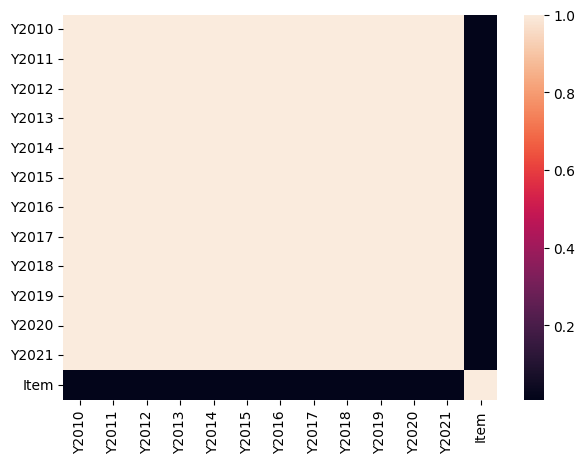

In [40]:
# making a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(x.corr())

In [56]:
encoderY = LabelEncoder()
encoderY.fit(y)
encodedY = encoderY.transform(y)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [59]:
# divide the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [60]:
df.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

((388181, 21), (226583, 13), (97107, 13), (226583,), (97107,))

In [61]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train

array([[-0.01778199, -0.0177451 , -0.01780276, ..., -0.01800273,
        -0.01803408,  1.44007843],
       [-0.01778237, -0.01774535, -0.017803  , ..., -0.01800295,
        -0.01803429, -0.29958324],
       [-0.01778237, -0.01774535, -0.01780301, ..., -0.01800295,
        -0.01803429,  0.98227273],
       ...,
       [-0.01778218, -0.01774523, -0.01780258, ..., -0.01800279,
        -0.01803408, -1.67300035],
       [-0.01777363, -0.01773655, -0.01779391, ..., -0.01798947,
        -0.01802133,  1.59268033],
       [-0.01762926, -0.01759467, -0.01763512, ..., -0.01784698,
        -0.01787756, -0.23854248]])

#### Training

In [62]:
# apply Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\USER\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
# implemented our model through logistic regression
y_pred = lr.predict(X_test)
y_pred


array(['World', 'Americas', 'World', ..., 'World', 'World', 'World'],
      dtype=object)

In [64]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.006477390919295211


In [66]:
import sklearn.metrics as metrics

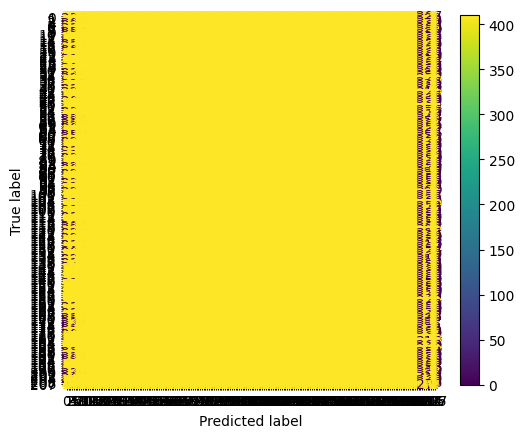

In [68]:

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
# print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show() 